# MCL-DSCI-011 Programming in Python for Data Science 

# Assignment 2: Table Manipulation and Chaining

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).  

### Assignment Learning Goals:

By the end of the module, students are expected to:
- Demonstrate how to rename columns of a dataframe using [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).
- Create new or columns in a dataframe using [`.assign()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html) notation.
- Drop columns in a dataframe using [`.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- Use `df[]` notation to filter rows of a dataframe.
- Calculate summary statistics on grouped objects using [`.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [`.agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).
- Explain when chaining is appropriate.
- Demonstrate chaining over multiple lines and verbs.

This assignment covers [Module 2](https://prog-learn.mds.ubc.ca/en/module2) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct.

In [1]:
# Import libraries needed for this lab
from hashlib import sha1
import test_assignment2 as t
import pandas as pd
import altair as alt


## 1. Loading files with Pandas 

In the previous module we loaded data from `csv` files using `pd.read_csv()` with limited arguments. However, most commonly you will need to create additional arguments or `pd.read_excel()` to load in a dataset to a dataframe that you can work with. `pd.read_excel()` and `pd.read_csv()` have many parameters that help read data files of different structures and formats. 

 In the `data` folder there are 8 different `.csv` and `.xlsx` files named `wine_letter.csv/.txt/.xlsx` (example- if the question is 1(f), the corresponding data is named `wine_f.csv`). Look at each of these files and use `pd.read_csv()` or `pd.read_excel()` to load these data so that they resemble the following:

|   | Grape | Origin | Alcohol | pH | Color | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **0** |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| **1** |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| **2** |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| **3** |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| **4** |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |


**Question 1(a)**  <br> {points: 1}   

Load in the file named `wine_a.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1a`.

In [2]:
df_1a = None

### BEGIN SOLUTION
# no special considerations here
df_1a = pd.read_csv('data/wine_a.csv')
### END SOLUTION



In [3]:
t.test_1a(df_1a)

'success'

**Question 1(b)**  <br> {points: 1}   

Load in the file named `wine_b.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1b`.

In [4]:
df_1b = None

### BEGIN SOLUTION
# Need to skip first row
df_1b = pd.read_csv('data/wine_b.csv',
                    header=1)

### END SOLUTION


In [5]:
t.test_1b(df_1b)

'success'

**Question 1(c)**  <br> {points: 1}   

Load in the file named `wine_c.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1c`.

In [6]:
df_1c = None

### BEGIN SOLUTION
# Need to read only first 5 rows
df_1c = pd.read_csv('data/wine_c.csv',
                    nrows=5)

### END SOLUTION



In [7]:
t.test_1c(df_1c)

'success'

**Question 1(d)**  <br> {points: 1}   

Load in the file named `wine_d.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1d`.

In [8]:
df_1d = None

### BEGIN SOLUTION
# Need to specify tab-delimited
df_1d = pd.read_csv('data/wine_d.txt',
                    delimiter='\t')
### END SOLUTION



In [9]:
t.test_1d(df_1d)

'success'

**Question 1(e)**  <br> {points: 1}   

Load in the file named `wine_e.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1e`.

In [10]:
df_1e = None

### BEGIN SOLUTION
# Need to use only the first 6 columns
df_1e = pd.read_csv('data/wine_e.csv',
                    usecols=[0, 1, 2, 3, 4, 5])

### END SOLUTION


In [11]:
assert 'df_1e' in locals(), "Your answer should be named 'df_1e'"

# Note that this test has been hidden intentionally.
# It will provide no feedback as to the correctness of your answers.
# Thus, it is up to you to decide if your answer is sufficiently correct.
### BEGIN HIDDEN TESTS

def hidden_1(answer):
    assert not answer is None, "Your answer does not exist. Have you passed in the correct variable?"
    assert answer.shape[0] == 5 and answer.shape[1] == 6, "Your dataframe dimensions are incorrect. Are you using the read_csv or read_excel function to load the data?"
    msg = "Your dataframe contains the incorrect columns. Are you using the use_cols parameter? \
    \nExpected ['Grape', 'Origin', 'Alcohol', 'pH', 'Colour','Aroma'], but got {0}".format(
        list(answer.columns))
    assert sorted(list(answer.columns)) == sorted(
        ['Grape', 'Origin', 'Alcohol', 'pH', 'Colour', 'Aroma']), msg
    assert "Chardonnay" in list(
        answer.Grape
    ), "Some values in your dataframe are incorrect. Do you have the correct dataframe?"
    assert sum(
        list(answer.Alcohol)
    ) == 69.33, "Some values in your dataframe are incorrect. Do you have the correct dataframe?"
    return("Success")

hidden_1(df_1e)
### END HIDDEN TESTS

'Success'

**Question 1(f)**  <br> {points: 1}   

Load in the file named `wine_f.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1f`.

In [12]:
df_1f = None

### BEGIN SOLUTION
# Need to use pd.read_csv() with tab delimiter
df_1f = pd.read_csv('data/wine_f.txt',
                  delimiter='\t',
                  header=1,
                  nrows=5,
                  usecols=[1, 2, 3, 4, 5, 6])

### END SOLUTION


In [13]:
t.test_1f(df_1f)

'success'

**Question 1(g)**  <br> {points: 1}   

Load in the file named `wine_g.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1g`.

In [14]:
df_1g = None

### BEGIN SOLUTION
# Need to use pd.read_excel()
df_1g = pd.read_excel('data/wine_g.xlsx')

### END SOLUTION


In [15]:
t.test_1g(df_1g)

'success'

**Question 1(h)**  <br> {points: 1}   

Load in the file named `wine_h.csv` using the appropriate verb `pd.read_csv()` or `pd.read_excel()` and arguments and save it as an object named `df_1h`.

In [16]:
df_1h = None

### BEGIN SOLUTION

# Need to use pd.read_excel() and specify sheet name
df_1h = pd.read_excel('data/wine_h.xlsx',
                    sheet_name='WINE')
### END SOLUTION



In [17]:
t.test_1h(df_1h)

'success'


**Question 1(i)**  <br> {points: 1}   

Pandas can also load files directly using a url. Let's explore this functionality using a simple dataset showing the number of people that immigrate to Canada from the US and Britain located [here](https://raw.githubusercontent.com/plotly/datasets/master/Move%20to%20Canada.csv).

Read the 'Move to Canada' .csv file using `pd.read_csv()` and store the dataframe as the variable `df`.

In [18]:
df = None

### BEGIN SOLUTION
url = 'https://raw.githubusercontent.com/plotly/datasets/master/Move%20to%20Canada.csv'
df = pd.read_csv(url)
### END SOLUTION 

In [19]:
t.test_1i(df)

'success'

## 2. Vancouver Street Tree dataset <a name='2.6'></a>

The City of Vancouver, nicknamed [Raincouver](https://blogs.ubc.ca/camdrohan/2012/08/14/the-truth-about-raincouver/) or [Raincity](https://en.wikipedia.org/wiki/Nicknames_of_Vancouver) surprises many non-residents by the sheer quantity of rain it receives. To locals, this is simply the expectations of living in a rainforest. The rainfall mixed with the temperate climate provides the perfect environment to maintain numerous species of trees across the city. Every year, Vancouver hosts a [cherry blossom festival](https://www.vcbf.ca/)  where people can take walks to view the blossoming cherry trees across the city,  post cherry blossom photos and attend a Cherry Jam Concert. People more interested in grandeur can explore the [giants in Stanley Park](https://www.insidevancouver.ca/2019/06/27/where-to-see-big-trees-in-vancouver/). 
In any case, The city has provided open data to all of Vancouver's street trees. The data includes the following:



-  TREE_ID
- CIVIC_NUMBER - Street number
- STD_STREET - Street name
- GENUS_NAME 
- SPECIES_NAME 
- CULTIVAR_NAME 
- COMMON_NAME 
- ASSIGNED - Indicates whether the address is made up to associate the tree with a nearby  lot (Y=Yes or N=No)
- ROOT_BARRIER - Root barrier installed (Y = Yes, N = No)
- PLANT_AREA - B = behind sidewalk, G = in tree grate, N = no sidewalk, C = cutout, a number  indicates boulevard width in feet
- ON_STREET_BLOCK
- ON_STREET
- NEIGHBOURHOOD_NAME 
- STREET_SIDE_NAME - The street side which the tree is physically located on (Even, Odd or Median  (Med))
- HEIGHT_RANGE_ID - 0-10 for every 10 feet (e.g., 0 = 0-10 ft, 1 = 10-20 ft, 2 = 20-30 ft, and10 = 100+ ft)
- DIAMETER - in inches
- CURB - Curb presence (Y = Yes, N = No)
- DATE_PLANTED 
- Geom   


**Question 2(a)**  <br> {points: 1}  

Load the `street-trees.csv` dataset into a pandas dataframe named `trees`.     
_Hint: How is your file delimited?_

In [20]:
trees = None

### BEGIN SOLUTION
trees = pd.read_csv('data/street-trees.csv',delimiter=';')
### END SOLUTION 

In [21]:
t.test_2a(trees)

'success'

**Question 2(b)**  <br> {points: 1}  

Create a new column named `DIAMETER_CM` that contains the each tree's diameter in cm. 
Don't forget to save the dataframe as the object `trees` to maintain the changes.    
_Note that 1 inch = 2.54cm._


In [22]:
CM_PER_INCH = 2.54
# trees = trees.assign(...)

### BEGIN SOLUTION
trees = trees.assign(DIAMETER_CM = trees['DIAMETER'] * CM_PER_INCH)
### END SOLUTION 

In [23]:
t.test_2b(trees)

'success'

**Question 2(c)**  <br> {points: 1}  
Filter so we can concentrate our attention on the cherry trees - specifically species `SERRULATA`.   
Save the resulting dataframe in an object called cherry.


In [24]:
# cherry = trees[...[...] == ...]

### BEGIN SOLUTION
cherry = trees[trees['SPECIES_NAME'] == 'SERRULATA']
### END SOLUTION 

In [25]:
t.test_2c(cherry)

'success'

**Question 2(d)**  <br> {points: 1}  

Group the cherry trees by their common name. Save the results in an object called `cherry_group`.

In [26]:
cherry_group = None 

### BEGIN SOLUTION
cherry_group = cherry.groupby('COMMON_NAME')
### END SOLUTION 

In [27]:
t.test_2d(cherry_group)

'success'

**Question 2(e)**  <br> {points: 1}  

For each type of cherry tree (`COMMON_NAME`) find the average diameter in cm and the number of the cherry trees for that cherry tree type.   
Name the new dataframe as `cherry_stats`.    
*Hint: Your dataframe should have the shape (16, 2).*     

In [28]:
# cherry_stats = (...
#                 .agg(...),
#                 .loc[...])

### BEGIN SOLUTION
cherry_stats = (cherry.groupby('COMMON_NAME')
                .agg(['mean', 'count'])
                .loc[:,'DIAMETER_CM'])
cherry_stats
### END SOLUTION 

,mean,count
COMMON_NAME,,
ACCOLADE CHERRY,52.768500,60
AMANOGAWA JAPANESE CHERRY,21.638559,68
CHEALS WEEPING CHERRY,8.128000,5
GREAT WHITE CHERRY,49.247778,9
JAPANESE FLOWERING CHERRY,42.627791,474
KWANZAN FLOWERING CHERRY,45.734833,10540
MIKURUMA-GAESHI CHERRY,40.640000,1
MIYAKO CHERRY,42.291000,2
PINK PERFECTION CHERRY,47.896517,522


In [29]:
t.test_2e(cherry_stats)

'success'

**Question 2(f)**  <br> {points: 1}  

Graph the mean diameter of `cherry_stats`.  Sort the values in ascending order before you use graph your results. Make sure you add a discriptive title and label the y-axis.        
Save the plot in an object called `cherry_graph`.   

In [34]:
### BEGIN SOLUTION
alt.data_transformers.disable_max_rows()
cherry_graph = alt.Chart(cherry).mark_bar().encode(
    x=alt.X('COMMON_NAME', sort="y"), 
    y=alt.Y('mean(DIAMETER):Q')).properties(
    title="Mean tree diameter of different cherry species")
### END SOLUTION

In [35]:
t.test_2f(cherry_graph)

'success'

## 3. The Titanic dataset <a name='2.6'></a>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg. The file *titanic.csv* contains data of 1309 passengers who were on the ship. For each passenger, the following data are recorded:
* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and the body was recovered)

***Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.***

In this exercise, you will perform a number of wrangling operations to manipulate and extract subsets of the data.

**Question 3(a)**  <br> {points: 1}   


Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.     
*Hint: Remember where we store our data*

In [36]:
titanic_df = None

### BEGIN SOLUTION
titanic_df = pd.read_csv('data/titanic.csv')
### END SOLUTION 

In [37]:
t.test_3a(titanic_df)

'success'

**Question 3(b)**  <br> {points: 1}  


The column names `sibsp` and `parch` are not very descriptive. Rename these columns to `siblings_spouses` and `parents_children` respectively.

In [38]:
### BEGIN SOLUTION
titanic_df = titanic_df.rename(columns={'sibsp': 'siblings_spouses',
                                        'parch': 'parents_children'})
### END SOLUTION 

In [39]:
t.test_3b(titanic_df)

'success'

**Question 3(c)**  <br> {points: 1}  

Drop the columns `body` and `cabin`, using a single line of code and save it as an object named `dropped_df`.

In [40]:
dropped_df = None

### BEGIN SOLUTION
dropped_df = titanic_df.drop(columns=['body', 'cabin'])
### END SOLUTION

In [41]:
t.test_3c(dropped_df)

'success'

**Question 3(d)**  <br> {points: 1}  
Which passengers survived (`survived = 1`) the disaster? Save the filtered dataframe in an object named `survived_titanic`. 

In [42]:
survived_titanic = None

### BEGIN SOLUTION
survived_titanic = titanic_df[titanic_df['survived'] == 1]
### END SOLUTION 

In [43]:
assert 'survived_titanic' in locals(), "Your answer should be named 'survived_titanic'"

# Note that this test has been hidden intentionally.
# It will provide no feedback as to the correctness of your answers.
# Thus, it is up to you to decide if your answer is sufficiently correct.
### BEGIN HIDDEN TESTS
def hidden_2(answer):
    assert not answer is None, "Your answer does not exist. Have you passed in the correct variable?"
    assert sha1(str(answer.shape[0] + 9).encode('utf8')).hexdigest(
    ) == '6d5db0e809f71a43d3bada01e4c1c4d4b501b435', "The number of rows are incorrect. Are you selecting only survivors?"
    assert round(
        sum(answer.fare)
    ) == 24681, "The sum of the fares is incorrect. Are you selecting only survivors?"
    assert round(
        answer.age.mean()
    ) == 29.0, "The average survivor age is incorrect. Are you selecting only survivors?"
    assert "24160" in list(
        answer.ticket
    ), "Some survivors are missing. Did you select all the survivors?"
    return ("Success")

hidden_2(survived_titanic)
### END HIDDEN TESTS

'Success'

**Question 3(e)**  <br> {points: 1}  
How many people survived the titanic?       
Save this in an object named `survivors`.

In [44]:
survivors = None

### BEGIN SOLUTION
survivors = survived_titanic.shape[0]

### END SOLUTION 

In [45]:
t.test_3e(survivors)

'success'

**Question 3(f)**  <br> {points: 1}  

Which passengers were in first class and younger than 16?   
Save the filtered dataframe in an object named `first_class_pass`. 

In [46]:
first_class_pass = None

### BEGIN SOLUTION
first_class_pass = titanic_df[(titanic_df['pclass'] == 1) & (titanic_df['age'] < 16)]
### END SOLUTION 

In [47]:
t.test_3f(first_class_pass)

'success'

**Question 3(g)**  <br> {points: 1}  

Make a new dataframe containing only the columns `age` and `fare` on the full `titanic_df` dataframe and take the mean of these columns using chaining.   
Save it as an object named  `mean_age_fare`


In [48]:
mean_age_fare= None 

### BEGIN SOLUTION
mean_age_fare = titanic_df.loc[:, ['age', 'fare']].mean()
### END SOLUTION 

In [49]:
t.test_3g(mean_age_fare)

'success'

**Question 3(h)**  <br> {points: 1}  

Let's make a groupby object by the column `sex`  on our full dataframe `titanic_df` and find the average value each of each column for `male` and `female` passengers.    
Save the results in an object named `titanic_sex_mean`.

In [50]:
titanic_sex_mean = None

### BEGIN SOLUTION
titanic_sex_mean = titanic_df.groupby(by='sex').mean()
titanic_sex_mean
### END SOLUTION 

,pclass,survived,age,siblings_spouses,parents_children,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [51]:
t.test_3h(titanic_sex_mean)

'success'

**Question 3(i)**  <br> {points: 1}  

To answer the question, assign the letter associated with the correct answer to a variable in the code cell below:   
Which statement below is accurate?

A. The average age of male passengers is lower than the total passenger mean age.    

B. The female passenger fare average is greater than the male passenger fare average.  

C. The male fare average is greater than than the total passenger fare average. 


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer3_i`.*

In [52]:
answer3_i = None

### BEGIN SOLUTION
answer3_i = "B"
### END SOLUTION

In [53]:
t.test_3i(answer3_i)

'success'

**Question 3(j)**  <br> {points: 1}  

What was the highest and lowest fair paid by male and female passengers? Use `.agg()` and save the dataframe as object `high_low_fare`.  


In [54]:
high_low_fare = None 

### BEGIN SOLUTION
high_low_fare = titanic_df.groupby(by='sex').agg({'fare':['max', 'min']})
### END SOLUTION

In [55]:
t.test_3j(high_low_fare)

'success'

**Question 3(k)**  <br> {points: 1}  

Use chaining to obtain the name of the youngest known female passenger and save it as object `youngest_female`.

In [56]:
youngest_female = None

### BEGIN SOLUTION
youngest_female = (titanic_df.groupby(by='sex')
                             .get_group('female')
                             .sort_values(by='age')
                             .iloc[0, 2]
                  )

### END SOLUTION


In [57]:
t.test_3k(youngest_female)

'success'

## 4. Titanic Analysis  


In exercise 3, we explored the dataset somewhat arbitrarily, trying to gain some insights into the data. In this exercise, we will carry out a number of steps to answer a single analysis question. 

> "How does a passenger's class, sex and age affect their chance of survival?"

Use chaining to answer each question.

One thing you may notice in the data is that there are missing values in the survived column that present themselves as`NaN`. This can be a potential problem as it could cause the analyst to draw inaccurate conclusions about the data. For this question, we will disregard this issue to concentrate on the skills we have learned up until now. We will, however, be returning to this topic further into the course and discuss how missing data effects analysis and different methods of handling them.

**Question 4(a)**  <br> {points: 1}  

Beginning the analysis with passenger class, find the mean survival rate of the 3 classes and plot this as a bar chart. Name the object `group_class`. Make sure that you give the plot a descriptive title and y-axis label.
You will need to groupby `pclass` and inorder to find the `mean` survival rate. Don't forget to `reset_index()` when plotting.

In [61]:
### BEGIN SOLUTION
# generate the plotting data
group_class_df = pd.DataFrame(titanic_df.groupby('pclass')['survived'].mean())
group_class_df = group_class_df.reset_index()

# plot the data
group_class = alt.Chart(
    group_class_df, width=500, height=300).mark_bar().encode(
        y=alt.Y('survived:Q', title="Survival Rate"),
        x=alt.X('pclass:N'),
    ).properties(title="Passenger Class Survival Rate")
### END SOLUTION

In [62]:
t.test_4a(group_class)

'success'

**Question 4(b)**  <br> {points: 1}  

To answer the question, assign the letter associated with the correct answer to a variable in the code cell below:   
Which statement below is accurate?

A. Passengers from 1st class had the highest survival rate

B. Passengers from 2nd class had the highest survival rate 

C. Passengers from 3rd class had the highest survival rate


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer4_b`.*

In [63]:
answer4_b = None

### BEGIN SOLUTION
answer4_b = "A"
### END SOLUTION

In [64]:
t.test_4b(answer4_b)

'success'

**Question 4(c)**  <br> {points: 1}  

Plot the mean survival rates for each sex using a bar chart. Name the object `group_sex`. Make sure that you give the plot a descriptive title and y-axis label. You will need to groupby `pclass` and inorder to find the `mean` survival rate. Don't forget to `reset_index()` when plotting.    

In [69]:
### BEGIN SOLUTION
# generate the plotting data
group_sex_df = pd.DataFrame(titanic_df.groupby('sex')['survived'].mean())
group_sex_df = group_sex_df.reset_index()
# plot the data
group_sex = alt.Chart(
    group_sex_df, width=500, height=300).mark_bar().encode(
        y=alt.Y('survived:Q', title="Survival Rate"),
        x=alt.X('sex'),
    ).properties(title="male and female passenger survival rate")

### END SOLUTION

In [70]:
t.test_4c(group_sex)

'success'

**Question 4(d)**  <br> {points: 1}  

To answer the question, assign the letter associated with the correct answer to a variable in the code cell below:   
Which statement below is accurate?

A. Male passengers had the highest survival rate

B. Female passengers had the highest survival rate 


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer4_d`.*

In [71]:
answer4_d = None

### BEGIN SOLUTION
answer4_d = "A"
### END SOLUTION

In [72]:
t.test_4d(answer4_d)

'success'

_Note to mike: Do you have a suggested better way of doing Question 4(e)?_ 

**Question 4(e)**  <br> {points: 1}  


Before we can do anything let's categorize the ages into 4 age classes into a column named `age_group`. Use the following conditions for each age class
- younger than 20 column values → "youth"   
- 20-39 column values → "adult"
- 40-59 column values → "older adult"   
- Age 60 and older column values → "senior" 

Find the mean survival rate of each `age_group` and plot this as a bar chart. Name the object `age_plot`.

In [75]:
### BEGIN SOLUTION
# generate plotting data
titanic_df.loc[titanic_df['age'] < 20, 'age_group'] = "youth"
titanic_df.loc[(titanic_df['age'] < 40) & (titanic_df['age'] >= 20),
               'age_group'] = "adult"
titanic_df.loc[(titanic_df['age'] < 60) & (titanic_df['age'] >= 40),
               'age_group'] = "older adult "
titanic_df.loc[titanic_df['age'] >= 60, 'age_group'] = "senior"
age_plot_df = titanic_df.groupby('age_group')['survived'].mean()
age_plot_df = age_plot_df.reset_index()

# plot data
age_plot = alt.Chart(
    age_plot_df, width=500, height=300).mark_bar().encode(
        y=alt.Y('survived:Q', title="Survival Rate"),
        x=alt.X('age_group'),
    ).properties(title="Age group survival rate")
### END SOLUTION

In [76]:
t.test_4e(age_plot)

'success'

**Question 4(f)**  <br> {points: 1}  

To answer the question, assign the letter associated with the correct answer to a variable in the code cell below:   
Which statement below is accurate?

A. youth passengers had the highest survival rate

B. adult passengers had the highest survival rate 

C. older adult passengers had the highest survival rate 

D. senior passengers had the highest survival rate 


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer4_f`.*


In [77]:
answer4_f = None

### BEGIN SOLUTION
answer4_f = "A"
### END SOLUTION

In [78]:
assert 'answer4_f' in locals(), "Your answer should be named 'answer4_f'"

# Note that this test has been hidden intentionally.
# It will provide no feedback as to the correctness of your answers.
# Thus, it is up to you to decide if your answer is sufficiently correct.
### BEGIN HIDDEN TESTS
def hidden_3(answer):
    assert not answer is None, "Your answer does not exist. Have you passed in the correct variable?"
    assert sha1((answer.lower() + "W").encode('utf8')).hexdigest(
    ) == "1953f1dae96593912b29962acc336ed1f8bb6600", "Answer is incorrect"
    return ("Success")

hidden_3(answer4_f)
### END HIDDEN TESTS

'Success'

**Question 4(g)**  <br> {points: 1}  

Let's go one step further now and do something a little new. Make a groupby object on 2 columns. Use columns `pclass` and `sex`. This is will give 6 separate groups: 
- Female and 1st class
- Female and 2nd class
- Female and 3rd class
- Male and 1st class
- Male and 2nd class
- Male and 3rd class

Next, find the mean value of the `survived` rate using `.loc[]` and sort them in decreasing survival rate. 

In [79]:
group_class_age= None

### BEGIN SOLUTION
group_class_age = (titanic_df.groupby(
    ['pclass', 'sex']).mean().loc[:, 'survived'].sort_values(ascending=False))
### END SOLUTION

In [80]:
t.test_4g(group_class_age)

'success'

**Question 4(h)**  <br> {points: 1}  
Now that you know how to group on multiple columns, We are going to try it on all 3 of the columns; `pclass`, `sex` and `age` . 

What is the maximum number of groups possible if we group by all 3 columns? 





*Answer in the cell below and assign the correct answer to an object called `answer4_h`*


In [81]:
answer4_h = None

### BEGIN SOLUTION
answer4_h = 3 * 2 * 4
### END SOLUTION


In [82]:
t.test_4h(answer4_h)

'success'

**Question 4(i)**  <br> {points: 1}  


Groupby all three columns and find the mean value of the `survived` rate using `.loc[]`. Sort them in decreasing survival rate,  similarly to what you did in question 4(g)

In [83]:
### BEGIN SOLUTION
titanic_df
group_class_sex_age = (titanic_df.groupby(['pclass', 'sex', 'age'])
                             .mean()
                             .loc[:,'survived']
                             .sort_values(ascending=False)
                  )
### END SOLUTION

In [84]:
t.test_4i(group_class_sex_age)

'success'

**Question 4(j)**  <br> {points: 1}  

Which of the 24 groups had a 100% rate of survival? Answer by creating an object with the class, then sex, then age group of the highest survival rate group. For example, if it were 2nd class adult males, your answer would be `[2, 'male', 'adult']`


In [85]:
answer4_j = [2, 'male', 'adult']

### BEGIN SOLUTION
answer4_j = [1, 'female', 'senior']
### END SOLUTION

In [86]:
t.test_4j(answer4_j)

Success


Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  

## Attributions
- City of Vancouver Open Data portal - [Street Trees Dataset](https://opendata.vancouver.ca/explore/dataset/street-trees/information/?disjunctive.species_name&disjunctive.common_name&disjunctive.height_range_id)
- MDS DSCI 523 - Data Wrangling course - [MDS's GitHub website](hhttps://ubc-mds.github.io/) 


## Module Debriefing

If this video is not showing up below, click on the cell and click the ▶ button in the toolbar above.

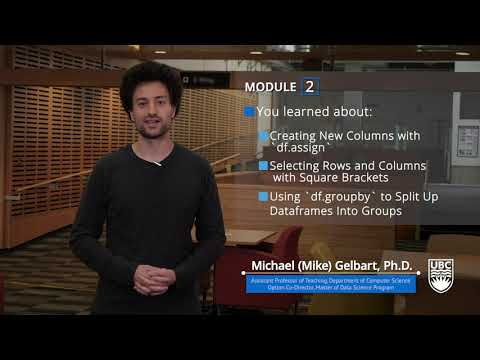

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('zHK_l0YPcKA', width=854, height=480)